In [1]:
#Importing important libraries

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [2]:
#Load Diabetes Data
myData = pd.read_csv('diabetes.csv')

In [3]:
myData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Select Features & Target Columns
X = myData.iloc[: , :-1]
y = myData.iloc[: , 8]

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
#Spilt data into test & train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
#Apply KNN Algorithm
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#Prediction Using KNN
y_pred= KNN.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [10]:
#Finding Accuracy
accuracyOfModel = accuracy_score(y_test,y_pred)
accuracyOfModel

0.640625

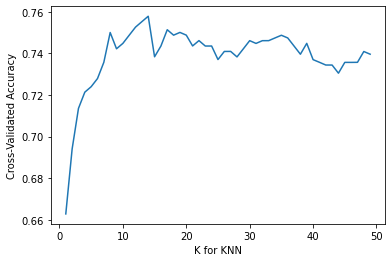

In [11]:
#K-Fold validation to get best value of K

kRange = range(1, 50)
k_scores = []
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(kRange, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [12]:
error=[]

for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  print(np.mean(pred_i != y_test))



0.3333333333333333
0.2916666666666667
0.359375
0.3072916666666667
0.34375
0.3072916666666667
0.3177083333333333
0.2916666666666667
0.2864583333333333
0.28125
0.3072916666666667
0.2552083333333333
0.2604166666666667
0.265625
0.2604166666666667
0.2708333333333333
0.2864583333333333
0.2864583333333333
0.2864583333333333
0.2916666666666667
0.296875
0.3020833333333333
0.3072916666666667
0.2916666666666667
0.296875
0.28125
0.2916666666666667
0.28125
0.2864583333333333
0.2760416666666667
0.28125
0.2708333333333333
0.2760416666666667
0.2708333333333333
0.2708333333333333
0.2760416666666667
0.2708333333333333
0.265625
0.2760416666666667
0.2864583333333333
0.2916666666666667
0.2864583333333333
0.2760416666666667
0.28125
0.2760416666666667
0.28125
0.2916666666666667
0.2916666666666667
0.2760416666666667


Text(0, 0.5, 'Mean Error')

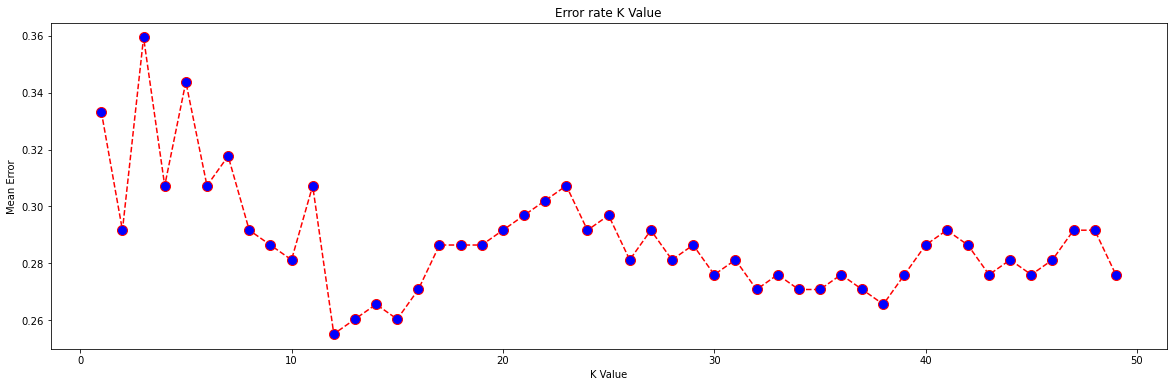

In [13]:
plt.figure(figsize=(20,6))
plt.plot(range(1,50),error,color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')